<table style="width: 100%;"> <tr> <td style="width: 20%; vertical-align: top;"> <img src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" alt="UdeA" height="150px"> </td> <td style="width: 80%; padding-left: 20px;"> <strong style="font-size: 30px;">GESTIÓN DE LA CADENA DE ABASTECIMIENTO-MODULO ALMACENAMIENTO </strong><br><br> <span style="font-size: 30px;"> Valentina Jiménez Torres <br> Juan Camilo Henao Caro<br> David Guillermo Diaz Rodriguez <br> Fernando Antonio Piñeres Ramos </span> </td> </tr> </table>

#### LIBRERÍAS REQUERIDAS


---



In [2]:
from google.colab import drive
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Conectar al drive local
drive.mount('/content/drive')
#Conectar al repositorio
path = '/content/drive/My Drive/cod/CA_inventarios'
sys.path.append(path) #para importar las funciones propias a través de import, porque incluye la carpeta del repositorio como uno de esos paquetes para que import busque funciones
os.chdir(path) #para que suba y descargue archivos de la ruta del repositorio de trabajo

Mounted at /content/drive


In [4]:
#Crear los df's de cada hoja del libro de excel
hojas_excel = pd.read_excel('/content/drive/My Drive/cod/CA_inventarios/data/bd_caso.xlsx', sheet_name=["Inventario inicial", "Salidas", "Entradas", "Maestro de materiales"])
df_inventario_inicial = hojas_excel["Inventario inicial"]
df_salidas = hojas_excel["Salidas"]
df_entradas = hojas_excel["Entradas"]
df_maestro_materiales = hojas_excel["Maestro de materiales"]

In [7]:
#Conectarse al colab de funciones

print("hola zapa valentina")

hola zapa valentina


# **Exploración**


---



## Visualización de los df's

In [ ]:
df_inventario_inicial.head()

,SKU,Inventario Inicial (Cajas)
0,13569,3
1,13970,574
2,13980,2380
3,17070,74
4,17090,150


In [ ]:
df_salidas.head()

,Transporte,Pedido,Entrega,Destinat.,SKU,CANT,Dia,Hora,Cajas por Pallet,Hora_entera
0,30113428,13515,92389141,13515,18375,100.0,2012-11-26,1900-01-01 07:00:00,33,7
1,30113428,13515,92389141,13515,20176,5.0,2012-11-26,1900-01-01 07:00:00,25,7
2,30113428,13515,92389141,13515,21250,6.0,2012-11-26,1900-01-01 07:00:00,18,7
3,30113428,13515,92389141,13515,21261,60.0,2012-11-26,1900-01-01 07:00:00,28,7
4,30113428,13515,92389141,13515,31002,2.0,2012-11-26,1900-01-01 07:00:00,80,7


In [ ]:
df_entradas.head()

,Material,Cajas,Documento de recibo,Fecha,Hora
0,20176,30.0,41239,2012-11-21,09:00:00
1,34259,6.0,41239,2012-11-21,09:00:00
2,34377,1.0,41239,2012-11-21,09:00:00
3,43564,3.0,41239,2012-11-21,09:00:00
4,71101,266.0,41239,2012-11-21,09:00:00


In [ ]:
df_maestro_materiales.head()

,SKU,Cajas por Pallet,Categoría,m3 por caja,Valor de la mercancía por caja,Kg por caja,Tamaño/Dimensión
0,13569,55,CARNES Y CARNES FRIAS,"0,047 M3",194444,7.05,600X400X196
1,13970,44,BEBIDAS NO ALCOHOLICAS,"0,049 M3",128660,6.09,500X500X196
2,13980,66,"GALLETERIA, CONFITERIA Y CHOCOLATES","0,039 M3",151408,4.56,510X390X196
3,17070,240,PANADERIA INDUSTRIAL,"0,008 M3",298914,2.12,295X195X140
4,17090,180,COSMETICOS,"0,011 M3",161853,2.85,350X190X140


## Cambio de nombre en los df's para que en todos los productos se llamen SKU

In [ ]:
df_maestro_materiales.rename(columns={'Material': 'SKU'}, inplace=True)
df_salidas.rename(columns={'Material': 'SKU'}, inplace=True)
df_entradas.rename(columns={'Material': 'SKU'}, inplace=True)

## Modificación en la columna "Kg por caja" de dt_maestro_materiales para su uso

In [ ]:
# Limpiar la columna 'Kg por caja', reemplazar la coma por punto y convertir a tipo numérico
df_maestro_materiales['Kg por caja'] = df_maestro_materiales['Kg por caja'].str.replace(' KG', '').str.replace(',', '.').astype(float)

## Validación de filas duplicados, datos nulos, datos '-' y otros errores

In [ ]:
for df, nombre in [(df_inventario_inicial, 'Inventario inicial'),(df_salidas, 'Salidas'),
                   (df_entradas, 'Entradas'), (df_maestro_materiales, 'Maestro de materiales')]:

    print(f'\n{"="*40}')
    print(f'Análisis del DataFrame: {nombre}')
    print(f'\n{"="*40}')

    print('\n📝 Tipos de datos:')
    print(df.dtypes)

    print('\n❌ Valores nulos por columna:')
    print(df.isnull().sum())

    print('\n Cantidad de filas duplicadas:')
    print(df.duplicated().sum())

    print('\n Filas con valores no numéricos (como "-", ".", vacíos):')
    for col in df.columns:
        # Revisar filas con valores "-", ".", o vacíos
        invalid_values = df[col].isin(['-', '.', '']).sum()
        if invalid_values >0:
            print(f'  ⚠️ Columna "{col}" tiene {invalid_values} filas con valores no válidos (como "-", ".", vacíos)')
        else:
            print(f'  ✅ Columna "{col}" = 0')



Análisis del DataFrame: Inventario inicial


📝 Tipos de datos:
SKU                           int64
Inventario Inicial (Cajas)    int64
dtype: object

❌ Valores nulos por columna:
SKU                           0
Inventario Inicial (Cajas)    0
dtype: int64

 Cantidad de filas duplicadas:
0

 Filas con valores no numéricos (como "-", ".", vacíos):
  ✅ Columna "SKU" = 0
  ✅ Columna "Inventario Inicial (Cajas)" = 0

Análisis del DataFrame: Salidas


📝 Tipos de datos:
Transporte                   int64
Pedido                       int64
Entrega                      int64
Destinat.                    int64
SKU                          int64
CANT                       float64
Dia                 datetime64[ns]
Hora                        object
Cajas por Pallet             int64
dtype: object

❌ Valores nulos por columna:
Transporte          0
Pedido              0
Entrega             0
Destinat.           0
SKU                 0
CANT                0
Dia                 0
Hora              

# **Solución de preguntas**


---




##  ¿Cuántas referencias se manejan?


In [ ]:
# Usamos inventrio inicial o maestro de materiales para revisar cuantos valores unicos hay en SKU
df_inventario_inicial['SKU'].nunique()

464

In [ ]:
df_maestro_materiales['SKU'].nunique()

464

## ¿Cuántas referncias se reciben y se despachan?

In [ ]:
len(df_salidas['SKU'].unique()) #revisar cuantos valores unicos de SKU hay en salidas

464

In [ ]:
len(df_entradas['SKU'].unique()) #revisar cuantos valores unicos de SKU hay en entradas

464

## ABC de productos por rotación (según CANT)

Se suman todas las CANT que corresponden a un mismo SKU para encontrar la cantidad total de salidas de ese SKU y se divide por la suma de toda la columna de CANT que es el total de todas las salidas y eso es el porcentaje de participación de ese SKU.

In [ ]:
#Se suma el total de salidas
df_salidas['CANT'] = df_salidas['CANT'].astype(int)
total_cajas = df_salidas['CANT'].sum()
print(total_cajas)

2307957


In [ ]:
#Se debe agrupar todos los CANT de cada SKU y hacer la suma y frecuencia acumulada
df_rotacion = df_salidas[['SKU', 'CANT']].groupby('SKU', as_index=False)['CANT'].sum().sort_values(by='CANT', ascending=False).copy()
df_rotacion['Suma Acumulada'] = df_rotacion['CANT'].cumsum() #Crear fila de suma acumulada
df_rotacion['Porcentaje Acumulado'] = (df_rotacion['Suma Acumulada'] / total_cajas) * 100 #Crear fila de porcentaje acumulado

In [ ]:
# Filtrar los SKUs que conforman el 80% del inventario total para la clase A
rotacion_A = df_rotacion[df_rotacion['Porcentaje Acumulado'] <= 80]
# Mostrar los resultados
print(f'✅ Número de SKUs que representan el 80% del inventario y que son tipo A: {len(rotacion_A)}')
print('\n SKUs que conforman el 80%:')
print(rotacion_A['SKU'])

✅ Número de SKUs que representan el 80% del inventario y que son tipo A: 46

 SKUs que conforman el 80%:
15     18331
8      18128
5      18043
291    71152
264    49001
9      18139
39     20186
418    97766
137    40284
25     18461
23     18444
414    97750
13     18244
6      18053
341    74011
21     18375
24     18451
16     18352
31     18556
265    49100
297    72302
18     18361
34     20072
12     18233
410    97715
355    80080
33     18571
403    97016
290    71121
163    43416
28     18535
43     20643
74     31639
334    73601
71     31373
69     31299
267    49114
275    62233
416    97764
146    41599
70     31369
52     21261
419    97768
284    70260
266    49113
67     31297
Name: SKU, dtype: int64


In [ ]:
# Filtrar los SKUs que conforman el 80%-95% del inventario para la clase B
rotacion_B = df_rotacion[(df_rotacion['Porcentaje Acumulado'] > 80) & (df_rotacion['Porcentaje Acumulado'] <= 95)]
print(f'✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: {len(rotacion_B)}')
print('\n SKUs que conforman el 80%-95%:')
print(rotacion_B['SKU'])

✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: 94

 SKUs que conforman el 80%-95%:
408    97711
417    97765
289    71111
11     18210
420    97769
       ...  
353    76151
279    62493
244    47301
180    43571
376    83150
Name: SKU, Length: 94, dtype: int64


In [ ]:
# Filtrar los SKUs que conforman el 95%-100% del inventario para la clase C
rotacion_C = df_rotacion[(df_rotacion['Porcentaje Acumulado'] > 95) & (df_rotacion['Porcentaje Acumulado'] <= 100)]
print(f'\n✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: {len(rotacion_C)}')
print('\n SKUs que conforman el 95%-100%:')
print(rotacion_C['SKU'])


✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: 324

 SKUs que conforman el 95%-100%:
127    34250
330    73465
431    97842
373    83020
407    97708
       ...  
320    72924
393    95150
282    62670
390    95015
29     18550
Name: SKU, Length: 324, dtype: int64


## ABC de popularidad (segun Pedido)

In [ ]:
#Calcular cuantos pedidos unicos estan asociados a cada SKU y ordenarlos de mayor a menor
df_salidas['SKU'] = df_salidas['SKU'].astype(str)
df_popularidad = df_salidas.groupby('SKU')['Pedido'].nunique().reset_index()
df_popularidad.rename(columns={'Pedido': 'Pedidos'}, inplace=True)
df_popularidad = df_popularidad.sort_values(by='Pedidos', ascending=False).copy()

In [ ]:
total_pedidos = df_popularidad['Pedidos'].sum()

In [ ]:
#Calcular la suma acumulada y el porcentaje acumulado
df_popularidad['Suma Acumulada'] = df_popularidad['Pedidos'].cumsum()
df_popularidad['Porcentaje Acumulado'] = (df_popularidad['Suma Acumulada'] / total_pedidos) * 100
df_popularidad

,SKU,Pedidos,Suma Acumulada,Porcentaje Acumulado
137,40284,101,101,0.905830
291,71152,100,201,1.802691
12,18233,100,301,2.699552
8,18128,100,401,3.596413
163,43416,99,500,4.484305
...,...,...,...,...
423,97800,1,11146,99.964126
426,97807,1,11147,99.973094
427,97830,1,11148,99.982063
19,18371,1,11149,99.991031


In [ ]:
# Filtrar los SKUs que conforman el 80% para la clase A
popularidad_A = df_popularidad[df_popularidad['Porcentaje Acumulado'] <= 80]
# Mostrar los resultados
print(f'✅ Número de SKUs que representan el 80% del inventario y que son tipo A: {len(popularidad_A)}')
print('\n SKUs que conforman el 80%:')
print(popularidad_A['SKU'])

✅ Número de SKUs que representan el 80% del inventario y que son tipo A: 149

 SKUs que conforman el 80%:
137    40284
291    71152
12     18233
8      18128
163    43416
       ...  
165    43514
145    41577
223    47060
288    71101
287    71100
Name: SKU, Length: 149, dtype: object


In [ ]:
# Filtrar los SKUs que conforman el 80%-95% para la clase B
popularidad_B = df_popularidad[(df_popularidad['Porcentaje Acumulado'] > 80) & (df_popularidad['Porcentaje Acumulado'] <= 95)]
print(f'✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: {len(popularidad_B)}')
print('\n SKUs que conforman el 80%-95%:')
print(popularidad_B['SKU'])

✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: 104

 SKUs que conforman el 80%-95%:
68     31298
166    43517
420    97769
85     31883
286    71052
       ...  
461    98883
247    47308
356    80091
366    80540
56     23067
Name: SKU, Length: 104, dtype: object


In [ ]:
# Filtrar los SKUs que conforman el 95%-100% para la clase C
popularidad_C = df_popularidad[(df_popularidad['Porcentaje Acumulado'] > 95) & (df_popularidad['Porcentaje Acumulado'] <= 100)]
print(f'\n✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: {len(popularidad_C)}')
print('\n SKUs que conforman el 95%-100%:')
print(popularidad_C['SKU'])


✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: 211

 SKUs que conforman el 95%-100%:
379    83433
75     31643
26     18530
91     31926
86     31910
       ...  
423    97800
426    97807
427    97830
19     18371
0      13569
Name: SKU, Length: 211, dtype: object


## ¿Cuántos pallets hay almacenados por SKU?

In [ ]:
# No la entendí

## ¿Cuántos DIS tengo por SKU?

In [ ]:
# No la entendí

## ¿Cuántos camiones se reciben durante el día?

In [ ]:
# Contar cuántos documentos de recibo únicos hay por cada fecha
df_recibidos_por_dia = df_entradas.groupby('Fecha')['Documento de recibo'].nunique().reset_index()
df_recibidos_por_dia.columns = ['Fecha', 'Camiones Recibidos']
df_recibidos_por_dia

,Fecha,Camiones Recibidos
0,2012-11-21,20
1,2012-11-22,20
2,2012-11-23,20
3,2012-11-24,20
4,2012-11-25,20
...,...,...
71,2013-02-14,20
72,2013-02-15,20
73,2013-02-16,20
74,2013-02-17,20


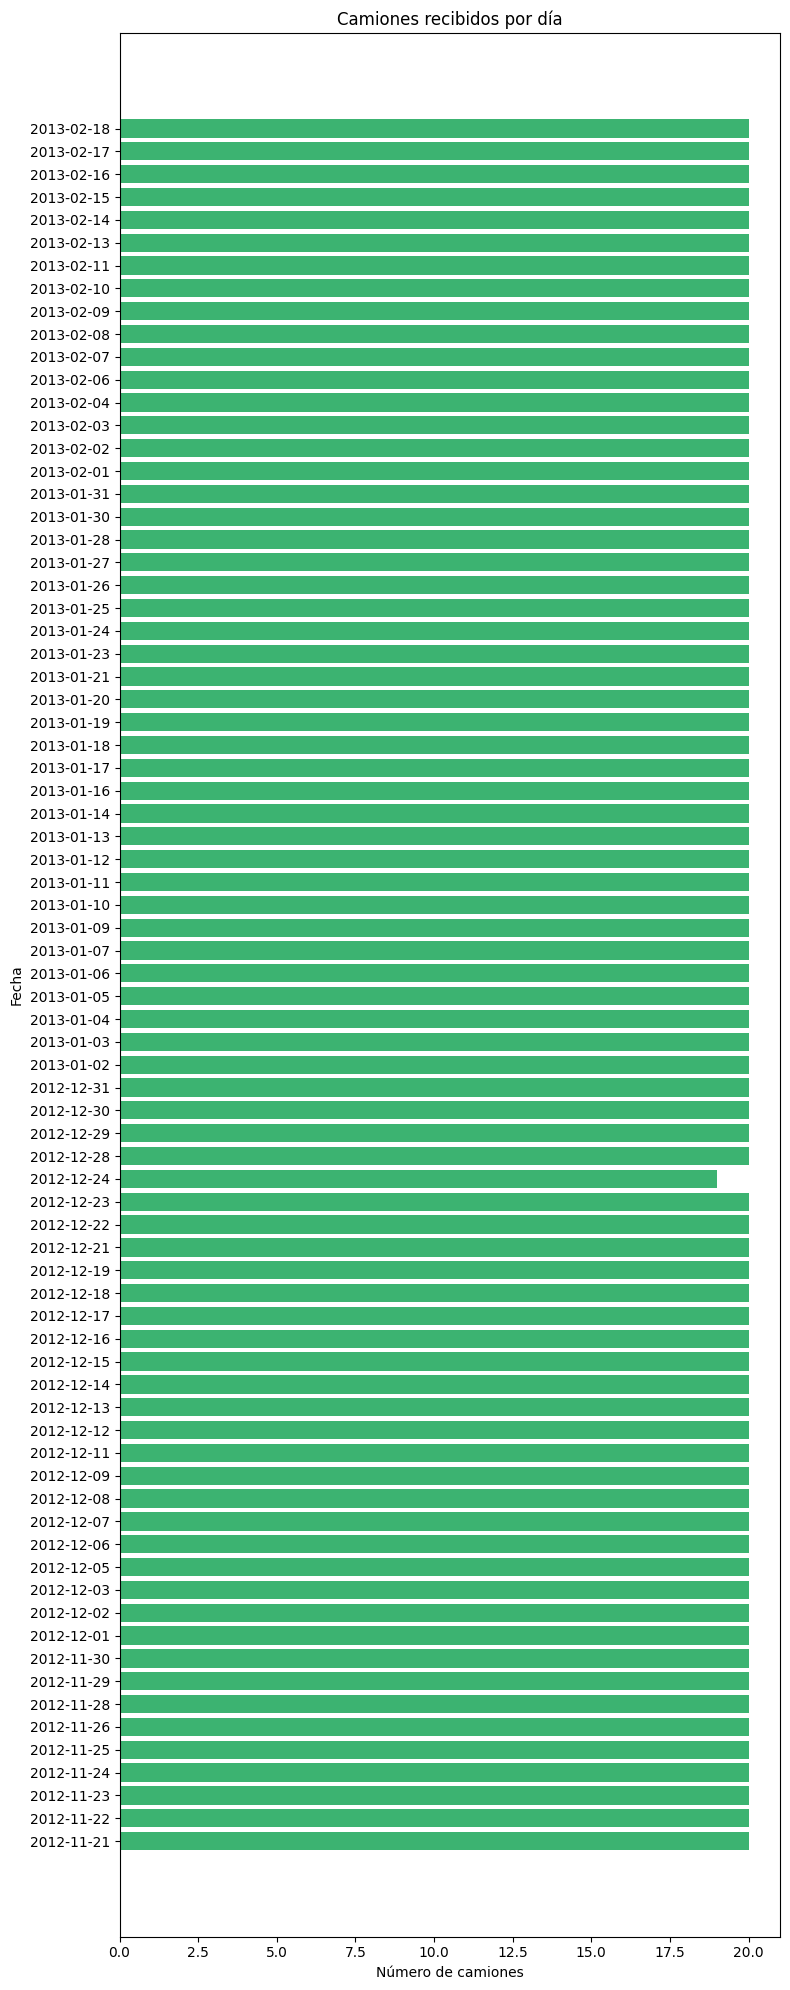

In [ ]:
plt.figure(figsize=(8, 20))
plt.barh(df_recibidos_por_dia['Fecha'].astype(str), df_recibidos_por_dia['Camiones Recibidos'], color='mediumseagreen')
plt.title('Camiones recibidos por día')
plt.xlabel('Número de camiones')
plt.ylabel('Fecha')
plt.tight_layout()
plt.show()

## ¿Cuántos camiones se reciben en cada turno de trabajo?

Asumiendo que los turnos son:

* 6AM a 2PM
* 2PM a 8PM
* 8PM a 6AM

In [ ]:
# Convertir la columna Hora a formato datetime.time
df_entradas['Hora'] = pd.to_datetime(df_entradas['Hora'], format='%H:%M:%S')

In [ ]:
# Contar camiones por turno
recibidos_turno1 = df_entradas[
    (df_entradas['Hora'].dt.hour >= 6) &
    (df_entradas['Hora'].dt.hour < 14)]['Documento de recibo'].nunique()

recibidos_turno2 = df_entradas[
    (df_entradas['Hora'].dt.hour >= 14) &
    (df_entradas['Hora'].dt.hour < 20)]['Documento de recibo'].nunique()

recibidos_turno3 = df_entradas[
    (df_entradas['Hora'].dt.hour >= 20) &
    (df_entradas['Hora'].dt.hour <= 6)]['Documento de recibo'].nunique()

# Crear la tabla
df_turnos_recibidos = pd.DataFrame({
    'Turno': ['Turno 6 AM - 2 PM', 'Turno 2 PM - 8 PM', 'Turno 8 PM - 6 AM'],
    'Camiones Recibidos': [recibidos_turno1, recibidos_turno2, recibidos_turno3 ]})

# Mostrar la tablita
df_turnos_recibidos

,Turno,Camiones Recibidos
0,Turno 6 AM - 2 PM,778
1,Turno 2 PM - 8 PM,640
2,Turno 8 PM - 6 AM,0


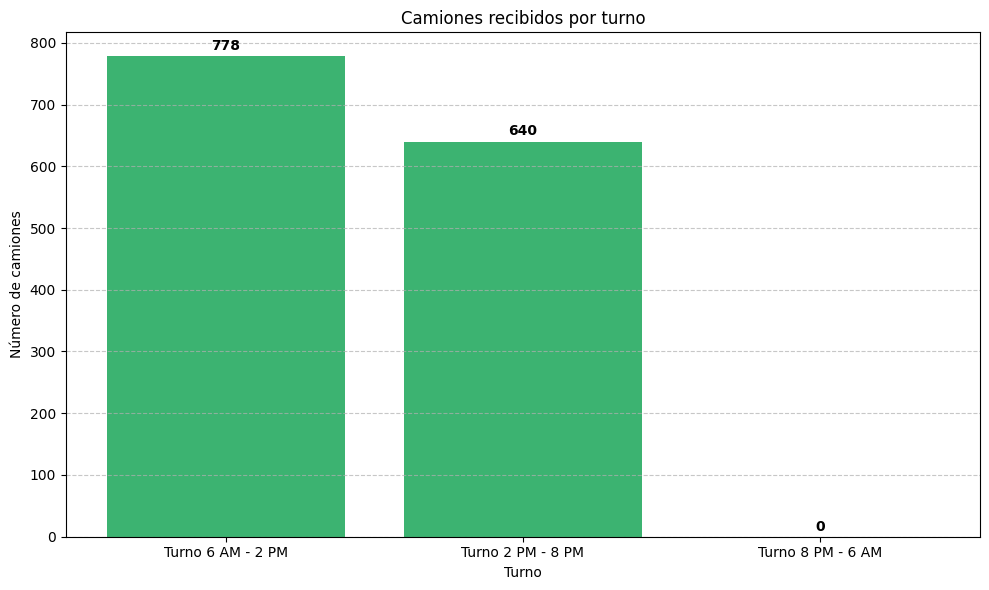

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_turnos_recibidos['Turno'].astype(str), df_turnos_recibidos['Camiones Recibidos'], color='mediumseagreen')
plt.title('Camiones recibidos por turno')
plt.xlabel('Turno')
plt.ylabel('Número de camiones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for i, v in enumerate(df_turnos_recibidos['Camiones Recibidos']):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## ¿Cuál es el volumen promedio de los vehículos que se reciben?

In [ ]:
# Calcular el volumen total de cajas por camión
volumen_por_camion = df_entradas.groupby('Documento de recibo')['Cajas'].sum()
volumen_por_camion

,Cajas
Documento de recibo,
41239,335.0
41240,1361.0
41241,863.0
41242,2457.0
41243,177.0
...,...
826480,2445.0
826500,1203.0
826520,2549.0


In [ ]:
#Calcular el volumen promedio
volumen_promedio = volumen_por_camion.mean()
print(f"\n El volumen promedio de los vehículos que se reciben es: {volumen_promedio:.2f} cajas por camión.")


 El volumen promedio de los vehículos que se reciben es: 1519.39 cajas por camión.


## ¿Cuál es el volumen promedio de los vehículos que se reciben?

In [ ]:
# Calcular el volumen total de cajas por camión
volumen_por_camion_s = df_salidas.groupby('Transporte')['CANT'].sum()
volumen_por_camion_s

,CANT
Transporte,
30113428,810
30113429,355
30113430,600
30113432,764
30113433,875
...,...
30117438,379
30117439,442
30117440,671


In [ ]:
#Calcular el volumen promedio
volumen_promedio_s = volumen_por_camion_s.mean()
print(f"\n El volumen promedio de los vehículos que se reciben es: {volumen_promedio_s:.2f} cajas por camión.")


 El volumen promedio de los vehículos que se reciben es: 714.98 cajas por camión.


## ¿Cuántos camiones se despacahan cada día?

In [ ]:
# Contar cuántos Transportes únicos hay por cada dia
df_despachados_por_dia = df_salidas.groupby('Dia')['Transporte'].nunique().reset_index()
df_despachados_por_dia.columns = ['Dia', 'Camiones Despachados']
df_despachados_por_dia

,Dia,Camiones Despachados
0,2012-11-26,26
1,2012-11-27,44
2,2012-11-28,34
3,2012-11-29,49
4,2012-11-30,52
...,...,...
71,2013-02-19,65
72,2013-02-20,58
73,2013-02-21,59
74,2013-02-22,43


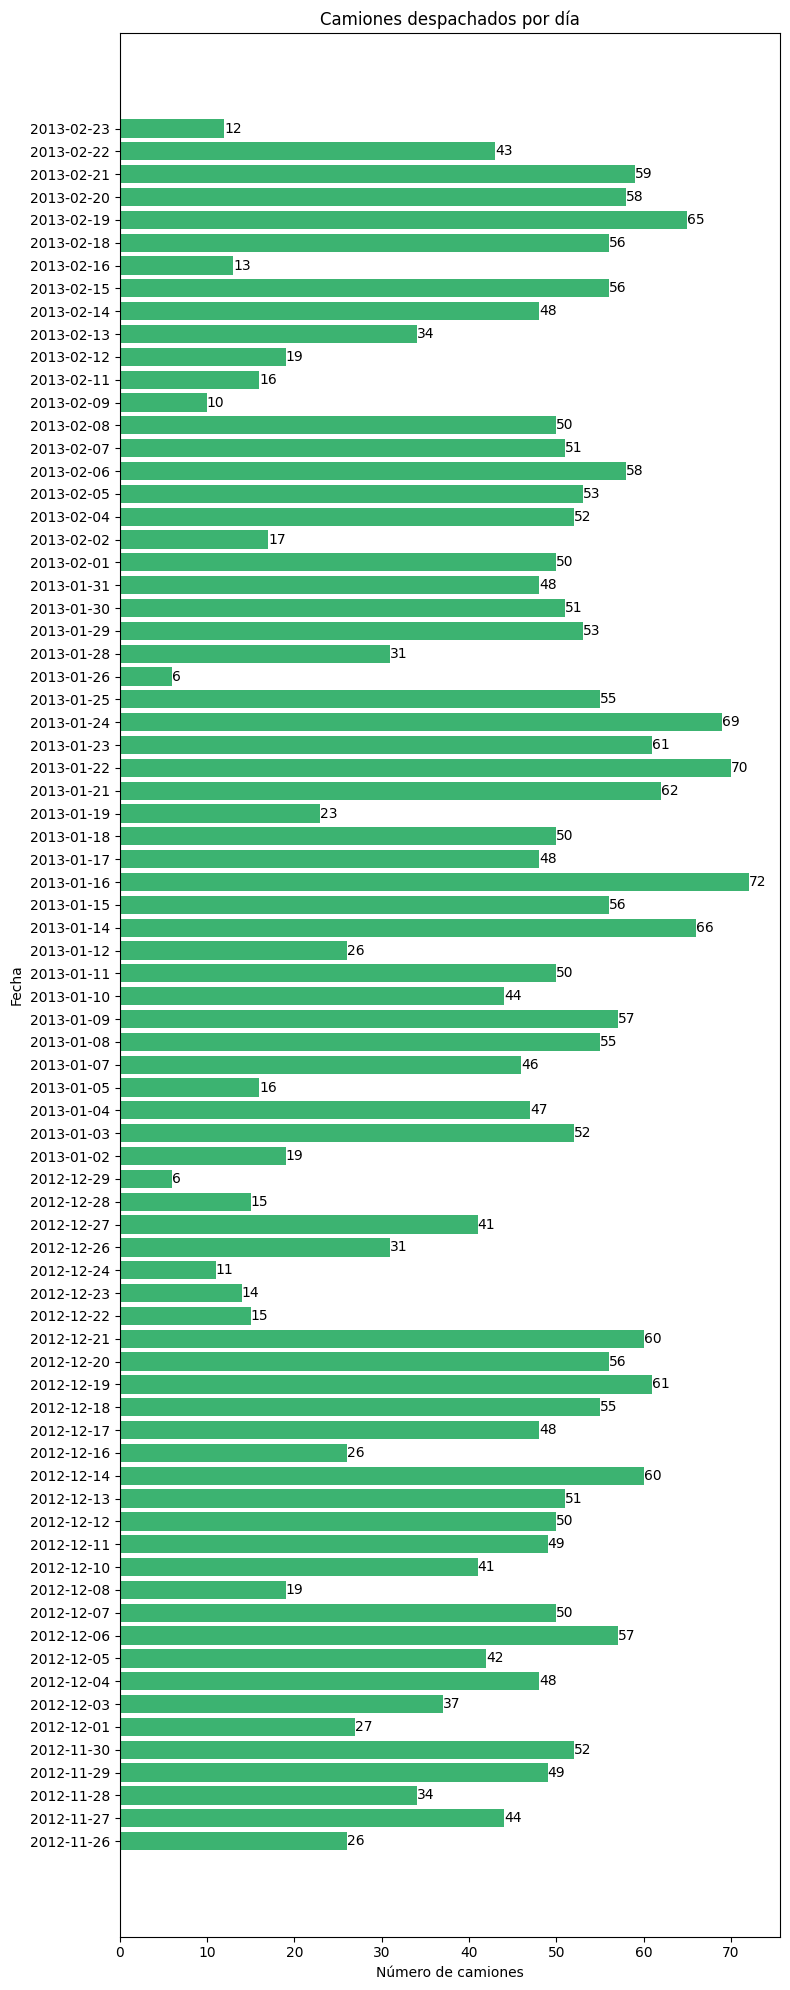

In [ ]:
plt.figure(figsize=(8, 20))
bars = plt.barh(df_despachados_por_dia['Dia'].astype(str), df_despachados_por_dia['Camiones Despachados'], color='mediumseagreen')

# Agregar los valores a la derecha de cada barra
for bar in bars:
    plt.text(
        bar.get_width(),  # Posición en el eje X
        bar.get_y() + bar.get_height() / 2,  # Posición en el eje Y (centro de la barra)
        str(bar.get_width()),  # El valor de la barra
        va='center',  # Alineación vertical (centrado)
        ha='left',  # Alineación horizontal (a la izquierda)
        color='black')  # Color del texto

plt.title('Camiones despachados por día')
plt.xlabel('Número de camiones')
plt.ylabel('Fecha')

plt.tight_layout()
plt.show()

## ¿Cuántos camiones se despachan cada turno de trabajo?

In [ ]:
# Convertir la columna Hora a formato datetime.time
df_salidas['Hora'] = pd.to_datetime(df_salidas['Hora'], format='%H:%M:%S')

In [ ]:
# Contar camiones por turno
despachados_turno1 = df_salidas[
    (df_salidas['Hora'].dt.hour >= 6) &
    (df_salidas['Hora'].dt.hour < 14)]['Transporte'].nunique()

despachados_turno2 = df_salidas[
    (df_salidas['Hora'].dt.hour >= 14) &
    (df_salidas['Hora'].dt.hour <= 20)]['Transporte'].nunique()

despachados_turno3 = df_salidas[
    (df_salidas['Hora'].dt.hour > 20) |
    (df_salidas['Hora'].dt.hour < 6)]['Transporte'].nunique()

# Crear la tabla
df_turnos_despachados = pd.DataFrame({
    'Turno': ['Turno 6 AM - 2 PM', 'Turno 2 PM - 8 PM', 'Turno 8 PM - 6 AM'],
    'Camiones Despachados': [despachados_turno1, despachados_turno2, despachados_turno3]})

# Mostrar la tablita
df_turnos_despachados

,Turno,Camiones Despachados
0,Turno 6 AM - 2 PM,2191
1,Turno 2 PM - 8 PM,1026
2,Turno 8 PM - 6 AM,11


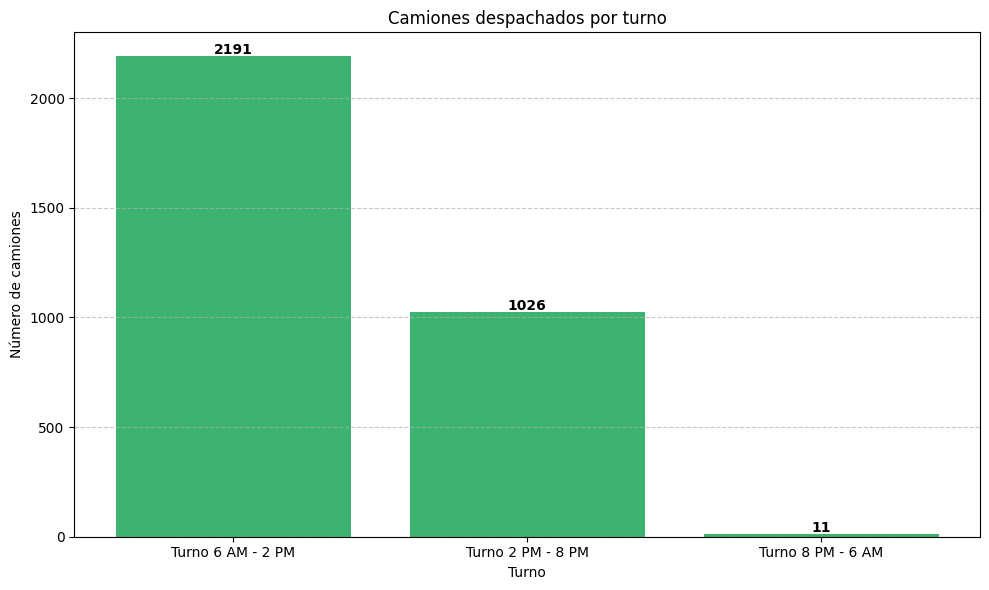

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_turnos_despachados['Turno'].astype(str), df_turnos_despachados['Camiones Despachados'], color='mediumseagreen')
plt.title('Camiones despachados por turno')
plt.xlabel('Turno')
plt.ylabel('Número de camiones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for i, v in enumerate(df_turnos_despachados['Camiones Despachados']):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## ¿Cuántos pallets completos se despachan por horas?

In [ ]:
# calcular pallets despachados por fila
df_salidas['pallets_despachados'] = df_salidas['CANT'] / df_salidas['Cajas por Pallet']

# agrupar por la hora (Hora_entera) y sumar
pallets_por_hora = df_salidas.groupby('Hora_entera')['pallets_despachados'].sum().reset_index()

# renombrar la columna 'Hora_entera' a 'Hora' y darle formato militar
pallets_por_hora = pallets_por_hora.rename(columns={'Hora_entera': 'Hora'})

# formatear la hora como HH:00 (por ejemplo 07:00, 14:00)
pallets_por_hora['Hora'] = pallets_por_hora['Hora'].apply(lambda x: f"{int(x):02d}:00")

# redondear a un decimal la cantidad de pallets
pallets_por_hora['pallets_despachados'] = pallets_por_hora['pallets_despachados'].round(1)


print(pallets_por_hora)

     Hora  pallets_despachados
0   00:00                 48.6
1   04:00                 24.8
2   06:00                209.8
3   07:00               1474.6
4   08:00               3755.7
5   09:00               5514.9
6   10:00               7328.9
7   11:00               6674.5
8   12:00               4087.4
9   13:00               6264.5
10  14:00               5998.0
11  15:00               4142.6
12  16:00               2082.4
13  17:00                596.4
14  18:00                213.4
15  19:00                 38.2
16  20:00                 76.7
17  21:00                 76.4
18  22:00                 18.2
19  23:00                 15.0


## ¿Cuántas cajas se tienen que despachar desde picking por hora?

In [ ]:
# revisar que la columna 'Hora' esté en formato datetime
df_salidas['Hora'] = pd.to_datetime(df_salidas['Hora'], format='%H:%M:%S')

# extraer la hora como número entero (0 a 23)
df_salidas['Hora_entera'] = df_salidas['Hora'].dt.hour

# se agrupa por hora del día y sumar las cajas despachadas
cajas_por_hora = df_salidas.groupby('Hora_entera')['CANT'].sum().reset_index()

# se verifica que todas las 24 horas estén representadas, incluso si no hubo despacho
todas_las_horas = pd.DataFrame({'Hora_entera': range(24)})
cajas_por_hora = todas_las_horas.merge(cajas_por_hora, on='Hora_entera', how='left')
cajas_por_hora['CANT'] = cajas_por_hora['CANT'].fillna(0)

# formatear hora para presentación
cajas_por_hora['Hora'] = cajas_por_hora['Hora_entera'].astype(str).str.zfill(2) + ":00"
cajas_por_hora = cajas_por_hora[['Hora', 'CANT']]


print("Cajas a despachar desde picking por cada hora del día:")
print(cajas_por_hora)

Cajas a despachar desde picking por cada hora del día:
     Hora       CANT
0   00:00    2550.00
1   01:00       0.00
2   02:00       0.00
3   03:00       0.00
4   04:00    1221.00
5   05:00       0.00
6   06:00   10134.00
7   07:00   70284.00
8   08:00  176629.00
9   09:00  241576.00
10  10:00  339379.00
11  11:00  316508.00
12  12:00  192744.00
13  13:00  299524.38
14  14:00  291398.00
15  15:00  209476.00
16  16:00   98438.00
17  17:00   31090.00
18  18:00   15056.00
19  19:00    1658.00
20  20:00    4033.00
21  21:00    4631.00
22  22:00     942.00
23  23:00     686.00


## ¿Cuál es el peso promedio de los pallets que están almacenando?

In [ ]:
# se calcula el peso por pallet
df_maestro_materiales['peso_por_pallet'] = df_maestro_materiales['Kg por caja'] * df_maestro_materiales['Cajas por Pallet']

# se calcula el peso promedio de los pallets
peso_promedio = df_maestro_materiales['peso_por_pallet'].mean()

print(f"Peso promedio de los pallets almacenados: {peso_promedio:.2f} kg")

Peso promedio de los pallets almacenados: 311.93 kg
